# Hyper-parameter dependence of DRL models

In [1]:
import tensorflow as tf
import configparser
import numpy as np
import pandas as pd
import os
from drl_grams import *
import seaborn as sns

#from state_env import State  # module with environment and dynamics
from RL_brain_pi_deep import DQNPrioritizedReplay  # sumtree version of DQN

2025-06-13 17:01:00.346772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term
Seed used: 1749844862


We base our algorithm in [1] but we add noise to training to solve a non-deterministic problem.
We optimize hyper-parameters using optuna library. We ran 50/100 trials for different chaing lengths.

Each folder in `optuna_drl` contains a summary file of stats and folders for individual trials containing the final model and the model that provided the best fidelity.



In [2]:
summary_file = 'optuna_drl/opt_for_n12_oaps_noise_per/summary.csv'
optuna_summary(summary_file,return_df=False)

Top 3 configurations based on binned_max_fid:
       Name  binned_max_fid  fc1_dims  learning_rate  epsilon_increment
0  trial_28        0.424253     102.0       0.000012           0.001478
1   trial_1        0.419350      90.0       0.000071           0.003929
2  trial_30        0.344507     203.0       0.000011           0.001774


INFO:tensorflow:Restoring parameters from optuna_drl/opt_for_n12_oaps_noise_per/trial_13/final_model/model.ckpt
Model restored successfully!
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: trial_metrics.pkl
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: best_action_sequences.txt
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: results.txt
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: logs
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: best_model
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: success_action_sequences.txt
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: final_model
Looking for config file in optuna_drl/opt_for_n12_oaps_noise_per/trial_13
Found file: best_fidelities.txt
Looking for config file in optuna_drl/

2025-06-13 17:01:02.501818: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2025-06-13 17:01:02.564889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Model restored successfully!
INFO:tensorflow:Restoring parameters from optuna_drl/opt_for_n12_oaps_noise_per/trial_13/final_model/model.ckpt
Testing with noise_amplitude: 0.0, noise_probability: 0.0


/home/sofi/Documentos/codigos/dynamic_control_for_QST/drl_grams.py:1827: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  noise_details = pd.concat(
/home/sofi/Documentos/codigos/dynamic_control_for_QST/drl_grams.py:1843: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  noise_effects = pd.concat(


Testing with noise_amplitude: 0.0, noise_probability: 0.1
Testing with noise_amplitude: 0.0, noise_probability: 0.2
Testing with noise_amplitude: 0.0, noise_probability: 0.30000000000000004
Testing with noise_amplitude: 0.0, noise_probability: 0.4
Testing with noise_amplitude: 0.0, noise_probability: 0.5
Testing with noise_amplitude: 0.0, noise_probability: 0.6000000000000001
Testing with noise_amplitude: 0.0, noise_probability: 0.7000000000000001
Testing with noise_amplitude: 0.0, noise_probability: 0.8
Testing with noise_amplitude: 0.0, noise_probability: 0.9
Testing with noise_amplitude: 0.0, noise_probability: 1.0
Testing with noise_amplitude: 0.1, noise_probability: 0.0
Testing with noise_amplitude: 0.1, noise_probability: 0.1
Testing with noise_amplitude: 0.1, noise_probability: 0.2
Testing with noise_amplitude: 0.1, noise_probability: 0.30000000000000004
Testing with noise_amplitude: 0.1, noise_probability: 0.4
Testing with noise_amplitude: 0.1, noise_probability: 0.5
Testing wi

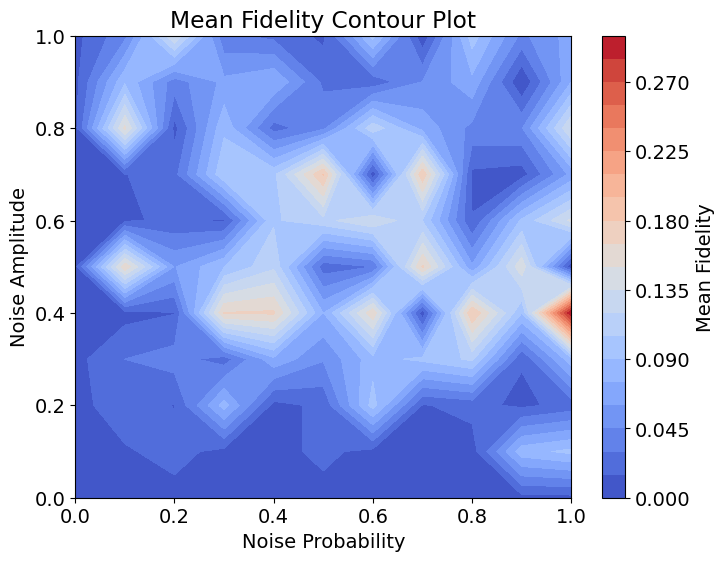

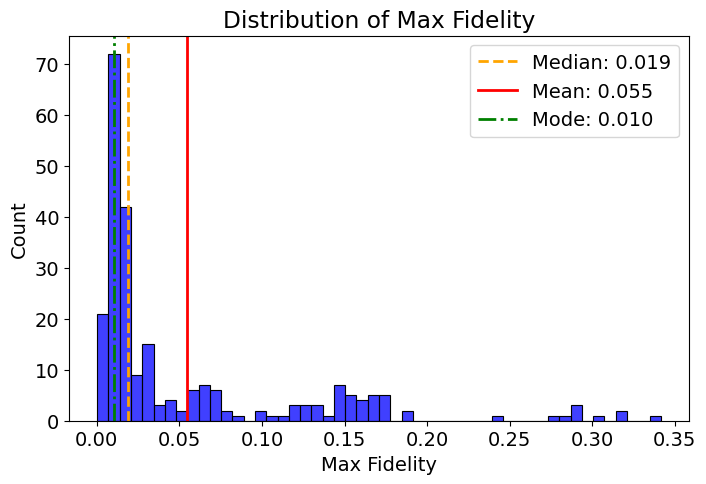

In [3]:
model_noise_summary('optuna_drl/opt_for_n12_oaps_noise_per/trial_13')

In [4]:
summary_file = 'optuna_drl/opt_for_n12_oaps_noise_per/summary.csv'
optuna_summary(summary_file,return_df=False)

Top 3 configurations based on binned_max_fid:
       Name  binned_max_fid  fc1_dims  learning_rate  epsilon_increment
0  trial_28        0.424253     102.0       0.000012           0.001478
1   trial_1        0.419350      90.0       0.000071           0.003929
2  trial_30        0.344507     203.0       0.000011           0.001774


In [5]:
tf.compat.v1.reset_default_graph()
sess = access_model('optuna_drl/opt_for_n8_oaps_noise_per/trial_13')
model_noise_summary('optuna_drl/opt_for_n8_oaps_noise_per/trial_13')

Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: trial_metrics.pkl
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: best_action_sequences.txt
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: results.txt
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: logs
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: best_model
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: success_action_sequences.txt
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: final_model
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: best_fidelities.txt
Looking for config file in optuna_drl/opt_for_n8_oaps_noise_per/trial_13
Found file: config.ini
Config file found: config.ini
INFO:tensorflow:Restoring parameters from optuna_drl/opt_for_

/home/sofi/Documentos/codigos/dynamic_control_for_QST/drl_grams.py:1827: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  noise_details = pd.concat(
/home/sofi/Documentos/codigos/dynamic_control_for_QST/drl_grams.py:1843: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  noise_effects = pd.concat(


Testing with noise_amplitude: 0.0, noise_probability: 0.2
Testing with noise_amplitude: 0.0, noise_probability: 0.30000000000000004
Testing with noise_amplitude: 0.0, noise_probability: 0.4
Testing with noise_amplitude: 0.0, noise_probability: 0.5
Testing with noise_amplitude: 0.0, noise_probability: 0.6000000000000001
Testing with noise_amplitude: 0.0, noise_probability: 0.7000000000000001
Testing with noise_amplitude: 0.0, noise_probability: 0.8
Testing with noise_amplitude: 0.0, noise_probability: 0.9
Testing with noise_amplitude: 0.0, noise_probability: 1.0
Testing with noise_amplitude: 0.1, noise_probability: 0.0
Testing with noise_amplitude: 0.1, noise_probability: 0.1
Testing with noise_amplitude: 0.1, noise_probability: 0.2
Testing with noise_amplitude: 0.1, noise_probability: 0.30000000000000004
Testing with noise_amplitude: 0.1, noise_probability: 0.4
Testing with noise_amplitude: 0.1, noise_probability: 0.5
Testing with noise_amplitude: 0.1, noise_probability: 0.600000000000

KeyboardInterrupt: 

## N = 8



In [ ]:
# Load the results summary of 50 trials for chain of length 8
n8_summary = pd.read_csv('optuna_drl/opt_for_n8_oaps_noise_per/summary.csv')

The following graphs give an insight into the complicated dependence the results have on the selected hyper-parameters. 

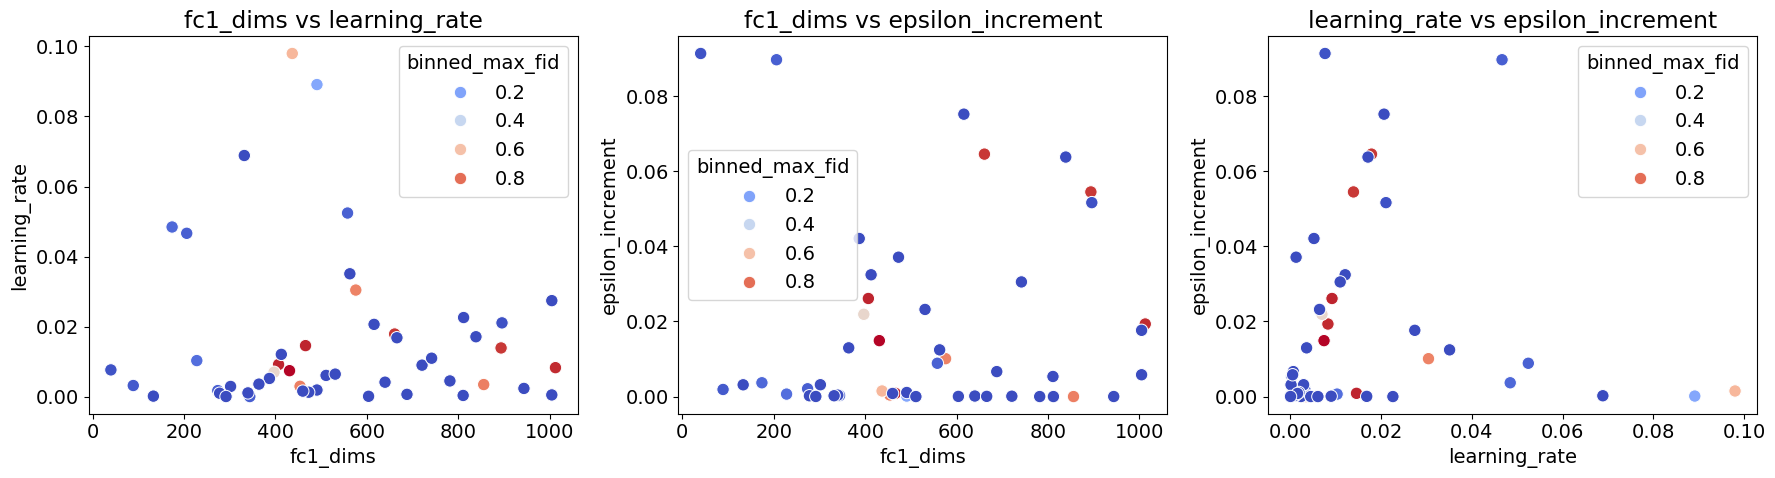

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=n8_summary,
    x='fc1_dims',
    y='learning_rate',
    hue='binned_max_fid',
    palette='coolwarm',
    s=80,
    ax=axes[0]
)
axes[0].set_title('fc1_dims vs learning_rate')

sns.scatterplot(
    data=n8_summary,
    x='fc1_dims',
    y='epsilon_increment',
    hue='binned_max_fid',
    palette='coolwarm',
    s=80,
    ax=axes[1]
)
axes[1].set_title('fc1_dims vs epsilon_increment')

sns.scatterplot(
    data=n8_summary,
    x='learning_rate',
    y='epsilon_increment',
    hue='binned_max_fid',
    palette='coolwarm',
    s=80,
    ax=axes[2]
)
axes[2].set_title('learning_rate vs epsilon_increment')

plt.tight_layout()
plt.show()

We consider the best model to be the one that achieves a higher fidelity when averaging over the last 100 episodes. The following table shows which trias provided the best results and the corresponding configuraions.

In [ ]:
n8_summary.sort_values(by='binned_max_fid', ascending=False).head(3)

# Display the top 3 configurations based on binned_max_fid
top_configs = n8_summary.sort_values(by='binned_max_fid', ascending=False).head(3)
print("Top 3 configurations based on binned_max_fid:")
print(top_configs[['Name', 'binned_max_fid', 'fc1_dims', 'learning_rate', 'epsilon_increment']])

Top 3 configurations based on binned_max_fid:
       Name  binned_max_fid  fc1_dims  learning_rate  epsilon_increment
0  trial_18        0.944262     431.0       0.007413           0.014893
1  trial_19        0.918034     407.0       0.009177           0.026114
2   trial_8        0.916027     466.0       0.014569           0.000873


### Loading model for top fidelities configuration



In [ ]:

# Load the RL model from the directory
directory = "optuna_drl/opt_for_n8_oaps_noise_per/trial_18"
# Find the config file in the directory

for file in os.listdir(directory):
    if file.endswith(".ini"):
        config_file = file
        break
    
config = configparser.ConfigParser()
# Read the config file
config.read(directory + "/" + config_file)

# Copy the config file to the current directory
current_directory = os.getcwd()
os.system(f"cp {directory}/{config_file} {current_directory}")

checkpoint_prefix = directory+'/final_model/model.ckpt'

# Load the model from the checkpoint
with tf.compat.v1.Session() as sess:
    # Restore the graph structure from the .meta file
    saver = tf.compat.v1.train.import_meta_graph(checkpoint_prefix + ".meta")
    
    # Restore the weights from the checkpoint
    saver.restore(sess, checkpoint_prefix)
    
    
    # The model is now loaded into the session
    print("Model restored successfully!")

input_tensor = tf.compat.v1.get_default_graph().get_tensor_by_name("s:0")
output_tensor = tf.compat.v1.get_default_graph().get_tensor_by_name("eval_net/l2/add:0")

INFO:tensorflow:Restoring parameters from optuna_drl/opt_for_n8_oaps_noise_per/trial_18/final_model/model.ckpt


2025-06-12 16:41:02.615664: W tensorflow/core/common_runtime/graph_constructor.cc:1533] Importing a graph with a lower producer version 134 into an existing graph with producer version 1395. Shape inference will have run different parts of the graph with different producer versions.


Model restored successfully!


In [ ]:
env = State()  # environment

n8_noise_effects = pd.DataFrame(columns=['noise_amplitude', 'noise_probability', 'mean_fidelity'])    # we store the mean fidelity for each noise amplitude and probability
n8_noise_details = pd.DataFrame(columns=['noise_amplitude', 'noise_probability', 'action_sequence', 'max_fidelity', 'sequence'])

for noise_amplitude in np.linspace(0, 1, 11):
    for noise_probability in np.linspace(0, 1, 11):
        print(f"Testing with noise_amplitude: {noise_amplitude}, noise_probability: {noise_probability}")
        

        with tf.compat.v1.Session() as sess:
            # Restore the graph structure and weights again
            saver.restore(sess, checkpoint_prefix)

            number_of_episodes = 100
            lth = config.getint("system_parameters", "max_t_steps")
            
            print("max_t_steps: ", lth)

            best_action_sequences = [[] for i in range(0, 10)]
            best_fidelities = np.zeros(10)

            actionspace = []  # store successful actions
            Qvalue = []  # total reward
            fid_max_vector = []  # max. fidelity in each episode
            t_fid_max_vector = []  # time of max. fidelity
            fid_end_vector = []  # final fidelity
            t_end_vector = []  # time of final fidelity
            success_action_sequences = []  # store successful success_action_seq

            for episode in range(number_of_episodes):
                # Generate a complex normalized vector of 16 components
                observation = env.reset()
                
                newaction = []
                Q = 0
                fid_max = 0
                t_fid_max = 0

                for i in range(lth):  # episode maximum length
                    # Use the loaded model to predict the action
                    # Correct the shape of the observation before feeding it to the model
                    predicted_action = sess.run(output_tensor, feed_dict={input_tensor: np.expand_dims(observation, axis=0)})
                    predicted_action = np.argmax(predicted_action)
                    newaction.append(predicted_action)

                    observation_, reward, done, fidelity = env.noisy_step(predicted_action,noise_amplitude=noise_amplitude,noise_probability=noise_probability)  # take action in the environment

                    Q += reward  # total reward
                

                    # Save max. fidelity value
                    if fidelity > fid_max:
                        fid_max = fidelity
                        t_fid_max = i

                    if done:  # fidelity(reward) larger than threshold
                        newaction += [0 for xx in range(lth - len(newaction))]
                        print(str(i + 1) + "  " + str(episode) + "  " + str(fidelity))
                        actionspace.append(newaction)
                        Qvalue.append(Q)
                        fid_max_vector.append(fid_max)
                        fid_end_vector.append(fidelity)
                        t_fid_max_vector.append(t_fid_max)
                        t_end_vector.append(i + 1)

                        if fid_max > 0.9:
                            success_action_sequences.append(newaction)

                            break

                    observation = observation_  # Update current state

                if i == lth - 1:
                    actionspace.append(newaction)
                    fid_max_vector.append(fid_max)
                    fid_end_vector.append(fidelity)
                    t_fid_max_vector.append(t_fid_max)
                    t_end_vector.append(i + 1)
                    Qvalue.append(Q)

                    if fid_max > 0.9:
                        success_action_sequences.append(newaction)

                if fid_max > min(best_fidelities):
                    idx = np.argmin(best_fidelities)
                    best_fidelities[idx] = fid_max
                    best_action_sequences[idx] = newaction

                episodes = np.arange(0, number_of_episodes)

                n8_noise_details = pd.concat(
                    [
                        n8_noise_details,
                        pd.DataFrame(
                            {
                                "noise_amplitude": noise_amplitude,
                                "noise_probability": noise_probability,
                                "max_fidelity": fid_max,
                            },
                            index=[0],
                        ),
                    ],
                    ignore_index=True,
                )


            n8_noise_effects = pd.concat(
                    [
                        n8_noise_effects,
                        pd.DataFrame(
                            {
                                "noise_amplitude": noise_amplitude,
                                "noise_probability": noise_probability,
                                "mean_fidelity": np.mean(fid_max_vector),
                            },
                            index=[0],
                        ),
                    ],
                    ignore_index=True,
                )

SyntaxError: invalid syntax (1777012953.py, line 99)

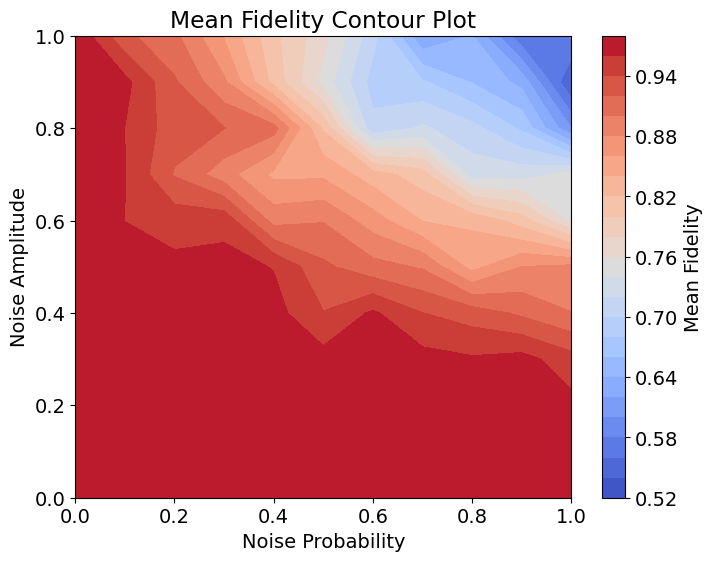

In [ ]:
pivot_data = n8_noise_effects.pivot(
    index='noise_amplitude',
    columns='noise_probability',
    values='mean_fidelity'
)

X, Y = np.meshgrid(pivot_data.columns.values, pivot_data.index.values)
Z = pivot_data.values

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=25, cmap='coolwarm')

from scipy import stats

import matplotlib.pyplot as plt
plt.colorbar(contour, label='Mean Fidelity')
plt.xlabel('Noise Probability')
plt.ylabel('Noise Amplitude')
plt.title('Mean Fidelity Contour Plot')
plt.show()

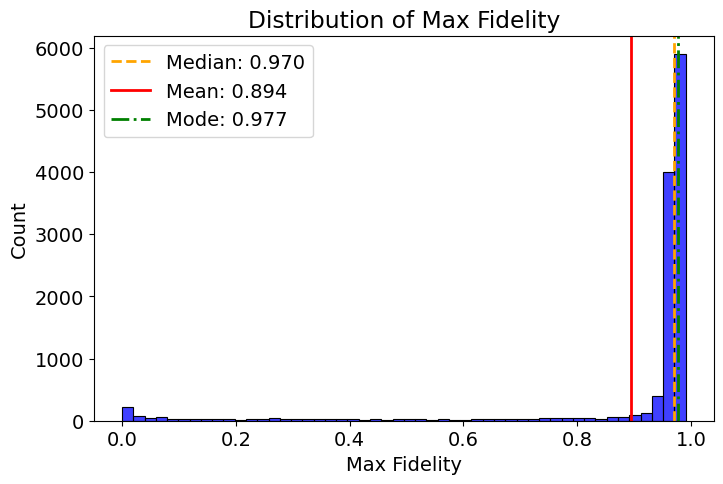

In [ ]:
from scipy import stats

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(n8_noise_details['max_fidelity'], bins=50, edgecolor='black')

# Calculate statistics
median = n8_noise_details['max_fidelity'].median()
mean = n8_noise_details['max_fidelity'].mean()
mode = n8_noise_details['max_fidelity'].mode().iloc[0]

# Plot vertical lines
plt.axvline(median, color='orange', linestyle='--', label=f'Median: {median:.3f}')
plt.axvline(mean, color='red', linestyle='-', label=f'Mean: {mean:.3f}')
plt.axvline(mode, color='green', linestyle='-.', label=f'Mode: {mode:.3f}')

plt.xlabel('Max Fidelity')
plt.ylabel('Count')
plt.title('Distribution of Max Fidelity')
plt.legend()
plt.show()